In [1]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
df = wrangle.get_zillow_sfr_data()
df.drop

In [3]:
train, validate, test = wrangle.clean_prep_zillow(df)

/Users/fullspectrum/codeup-data-science/logistic_regression/wrangle.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)
/Users/fullspectrum/codeup-data-science/logistic_regression/wrangle.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([df.columns[0]], axis = 1, inplace = True)
/Users/fullspectrum/codeup-data-science/logistic_regression/wrangle.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [4]:
train.head()

,bedroom,bathroom,sqrft,tax_value,year_built,taxamount,fips
1766466,3.0,2.0,1642.0,231120.0,1960.0,2898.13,6037.0
1073889,3.0,2.0,1858.0,178499.0,1955.0,2204.12,6059.0
1223806,5.0,5.0,4433.0,913447.0,2001.0,10717.51,6037.0
1694410,2.0,1.0,888.0,54621.0,1953.0,606.26,6037.0
1436362,2.0,2.0,1966.0,760368.0,1925.0,8290.04,6037.0


Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

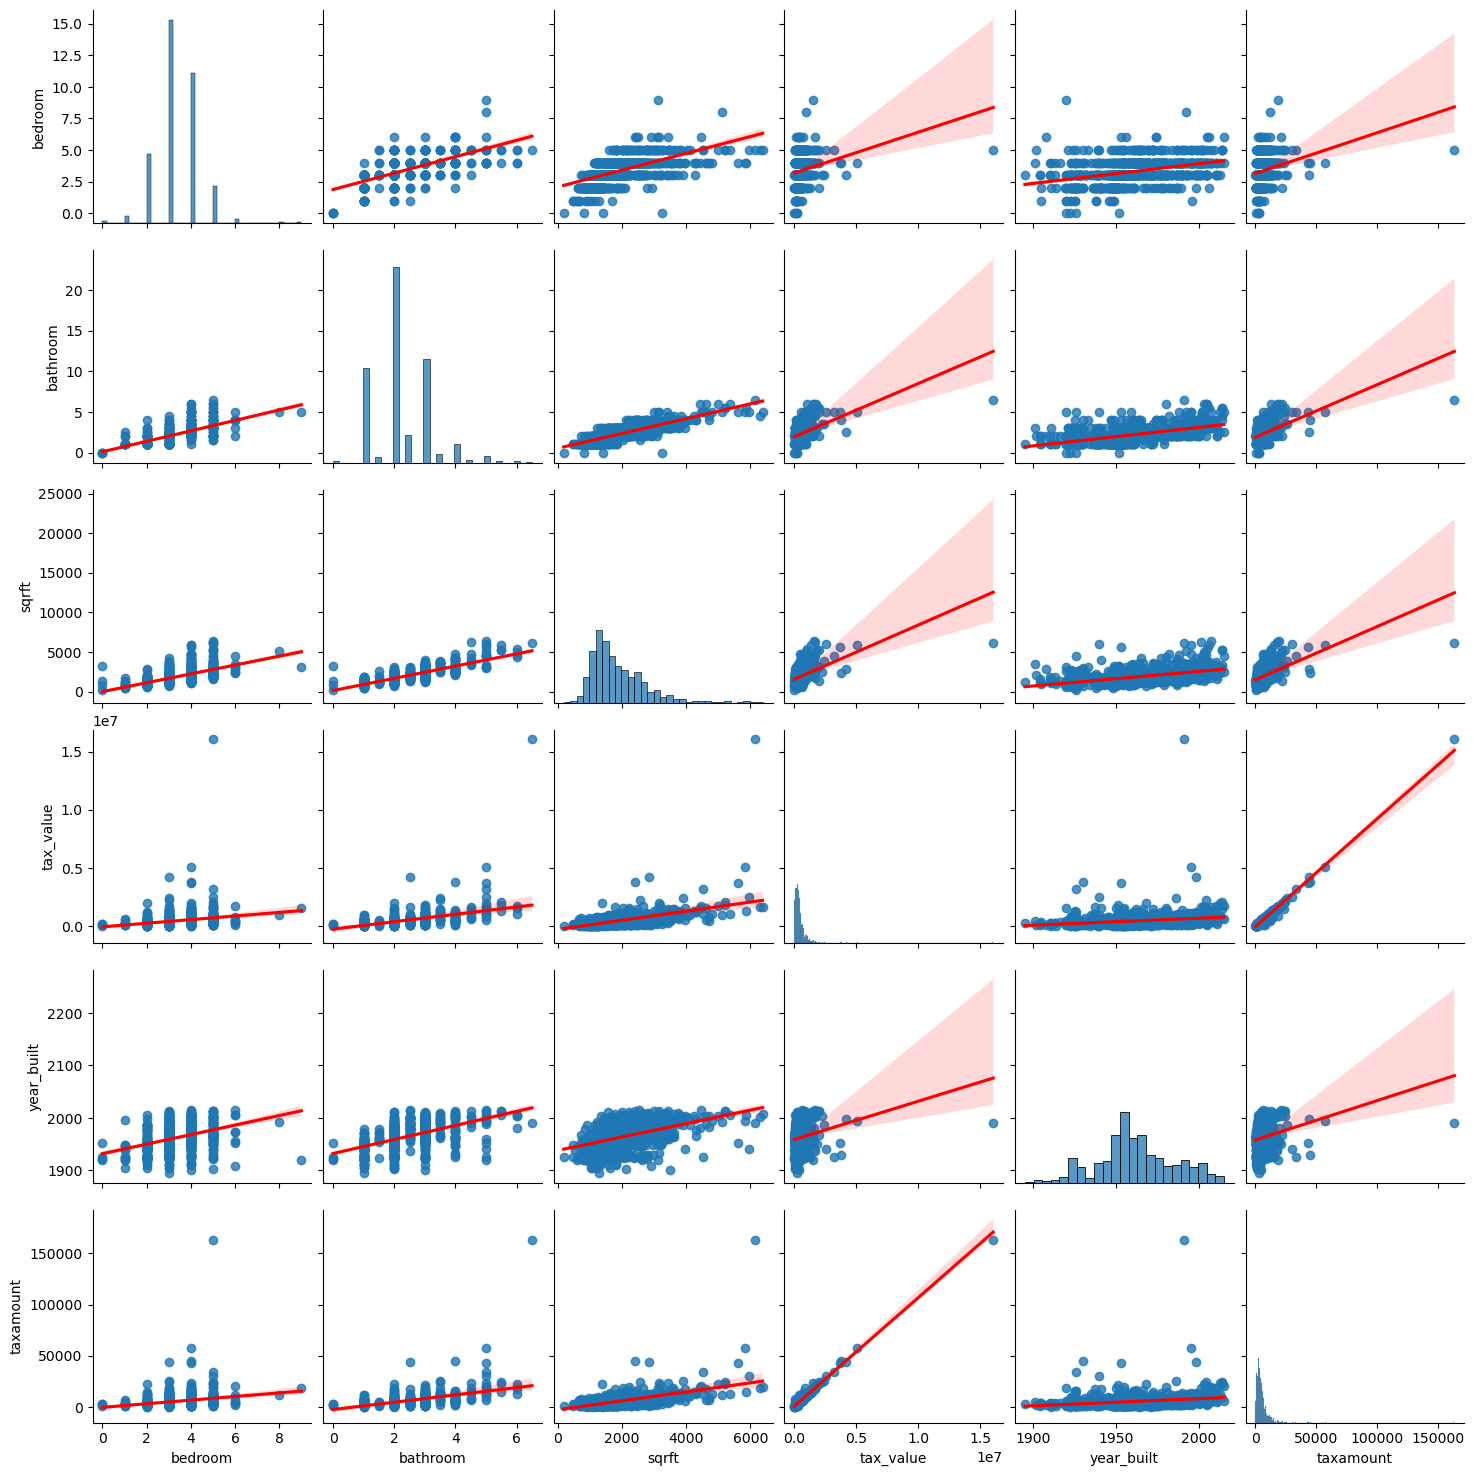

,bedroom,bathroom,sqrft,tax_value,year_built,taxamount
1766466,3.0,2.0,1642.0,231120.0,1960.0,2898.13
1073889,3.0,2.0,1858.0,178499.0,1955.0,2204.12
1223806,5.0,5.0,4433.0,913447.0,2001.0,10717.51
1694410,2.0,1.0,888.0,54621.0,1953.0,606.26
1436362,2.0,2.0,1966.0,760368.0,1925.0,8290.04
...,...,...,...,...,...,...
811039,2.0,1.0,1064.0,236609.0,1929.0,2982.56
1869699,5.0,2.0,1384.0,215963.0,1956.0,2883.12
848426,3.0,2.0,995.0,143048.0,1955.0,1932.42
1295396,3.0,2.0,1911.0,1387783.0,1946.0,16730.04


In [15]:
def plot_variable_pairs(dfi):
    dfi = dfi.drop(columns = ['fips'])
    sns.pairplot(dfi.sample(1000), kind="reg", plot_kws={'line_kws':{'color':'red'}})
    plt.show()
    return dfi

plot_variable_pairs(train)

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [31]:
train.head().T
def plot_categorical_and_continuous(dfi, cat, cont):
    datain = dfi.sample(1000)
    sns.boxplot(x= dfi[cat], y= dfi[cont], data=datain)
    plt.show()
    sns.violinplot(x= dfi[cat], y= dfi[cont], data=datain)
    plt.show()
    sns.barplot(x= dfi[cat], y= dfi[cont], data=datain)
    plt.show()
    return dfi

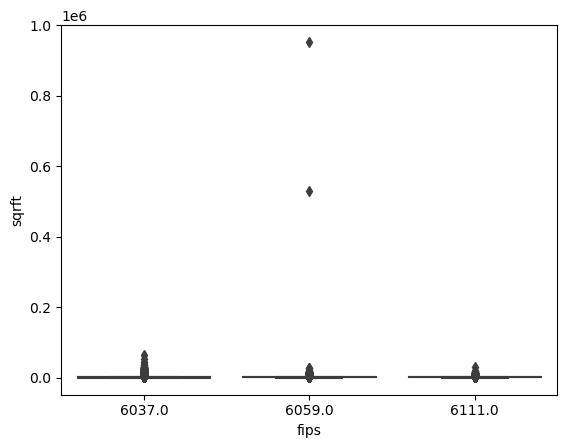

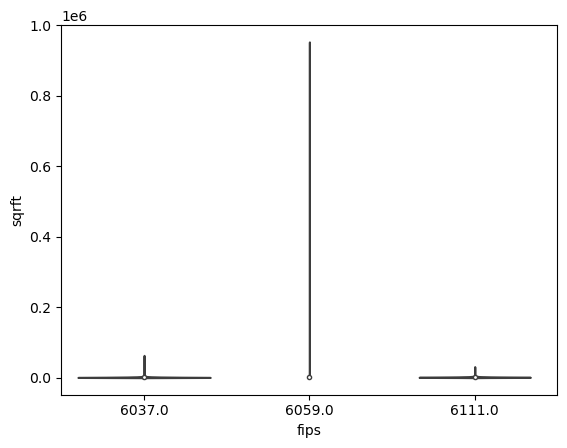

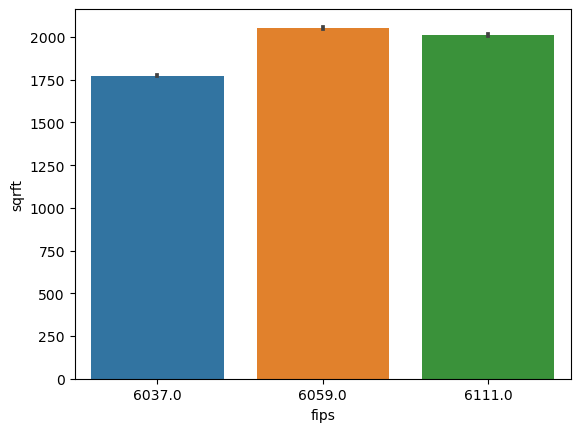

,bedroom,bathroom,sqrft,tax_value,year_built,taxamount,fips
1766466,3.0,2.0,1642.0,231120.0,1960.0,2898.13,6037.0
1073889,3.0,2.0,1858.0,178499.0,1955.0,2204.12,6059.0
1223806,5.0,5.0,4433.0,913447.0,2001.0,10717.51,6037.0
1694410,2.0,1.0,888.0,54621.0,1953.0,606.26,6037.0
1436362,2.0,2.0,1966.0,760368.0,1925.0,8290.04,6037.0
...,...,...,...,...,...,...,...
811039,2.0,1.0,1064.0,236609.0,1929.0,2982.56,6037.0
1869699,5.0,2.0,1384.0,215963.0,1956.0,2883.12,6037.0
848426,3.0,2.0,995.0,143048.0,1955.0,1932.42,6059.0
1295396,3.0,2.0,1911.0,1387783.0,1946.0,16730.04,6037.0


In [34]:
plot_categorical_and_continuous(train, 'fips', 1)

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Come up with some initial hypotheses based on your goal of predicting property value.

Visualize all combinations of variables in some way.

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Explore your dataset with any other visualizations you think will be helpful.